In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [34]:
# 이미지 필터링이 잘 되는 이미지
#image_path = 'eggs/0823112955_0_07383-01_0.jpg'
#image_path = 'eggs/0823112958_0_07386-05_0.jpg'

# 이미지 필터링이 잘 안되는 이미지
image_path = 'eggs/0823112958_0_07386-10_3.jpg'

# 기울어진 계란 처리 필요
#image_path = 'eggs/0823113001_1_07389_4.jpg'

필터링 참고: https://ngost.tistory.com/56

In [8]:
def adjust_gamma(image, gamma=1.0):
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")
    # apply gamma correction using the lookup table
    return cv.LUT(image, table)


file=eggs/0823112958_0_07386-10_3.jpg shape=(352, 272, 3)


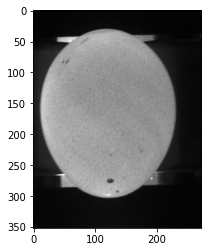

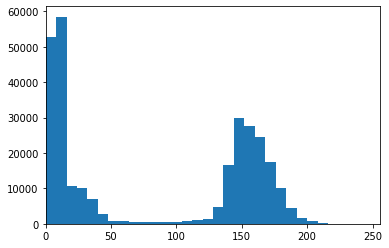

In [35]:
img = cv.imread(image_path)
#img = cv.imread('0823112958_0_07386-05_0.jpg')
#img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
plt.imshow(img)
print(f'file={image_path} shape={img.shape}')
fig, ax = plt.subplots(1, 1)
ax.hist(img.ravel(), bins=32, range=[0, 256])
ax.set_xlim(0, 256);

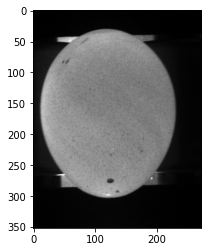

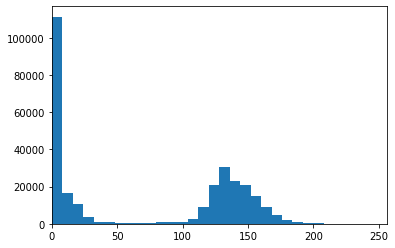

In [36]:
final = adjust_gamma(img, gamma=0.8)
plt.imshow(final)
fig, ax = plt.subplots(1, 1)
ax.hist(final.ravel(), bins=32, range=[0, 256])
ax.set_xlim(0, 256);

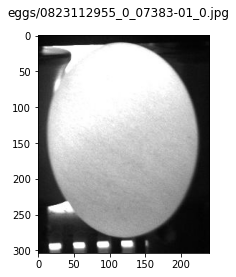

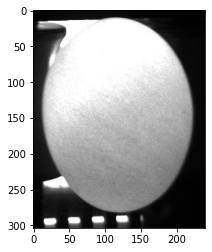

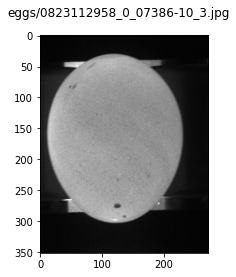

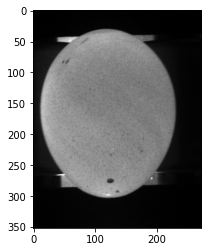

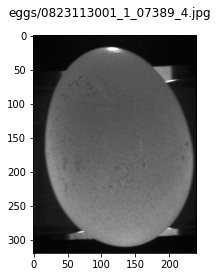

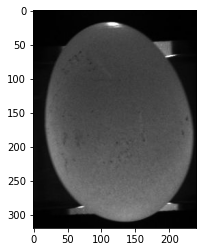

In [19]:
image_list = [
    'eggs/0823112955_0_07383-01_0.jpg',
    #'eggs/0823112958_0_07386-05_0.jpg',
    'eggs/0823112958_0_07386-10_3.jpg',
    'eggs/0823113001_1_07389_4.jpg',
]
for img_path in image_list:
    img = cv.imread(img_path)
    img2 = img.copy()
    applyed = adjust_gamma(img2, gamma=0.8)
    fig=plt.figure()
    fig.suptitle(img_path)
    plt.imshow(img)
    plt.figure()
    plt.imshow(applyed)